<a href="https://colab.research.google.com/github/dinilsonpedroza/Jupyter/blob/main/bctxc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen 
%matplotlib inline

In [ ]:
balcom = pd.read_csv('/content/balcom.csv', decimal = ',') ### lendo o arquivo com decimais separados por vírgulas.

In [ ]:
balcom

,bc,ex,im,txc
0,-398.7,2970.1,3368.9,0.8420
1,-1151.6,2945.8,4097.5,0.8515
2,-1019.5,3786.9,4806.3,0.8960
3,-565.7,3382.4,3948.1,0.9130
4,-781.7,4200.1,4981.8,0.9060
...,...,...,...,...
316,7426.6,26440.5,19013.9,5.2322
317,7519.9,29321.1,21801.2,5.0022
318,6348.6,25827.1,19478.5,5.1216
319,5760.5,27490.0,21729.5,5.1433


In [ ]:
balcom['data'] = pd.date_range(start='01/01/1995', periods=len(balcom.bc), freq='M') ### acrescentando uma coluna de data.

In [ ]:
balcom

,bc,ex,im,txc,data
0,-398.7,2970.1,3368.9,0.8420,1995-01-31
1,-1151.6,2945.8,4097.5,0.8515,1995-02-28
2,-1019.5,3786.9,4806.3,0.8960,1995-03-31
3,-565.7,3382.4,3948.1,0.9130,1995-04-30
4,-781.7,4200.1,4981.8,0.9060,1995-05-31
...,...,...,...,...,...
316,7426.6,26440.5,19013.9,5.2322,2021-05-31
317,7519.9,29321.1,21801.2,5.0022,2021-06-30
318,6348.6,25827.1,19478.5,5.1216,2021-07-31
319,5760.5,27490.0,21729.5,5.1433,2021-08-31


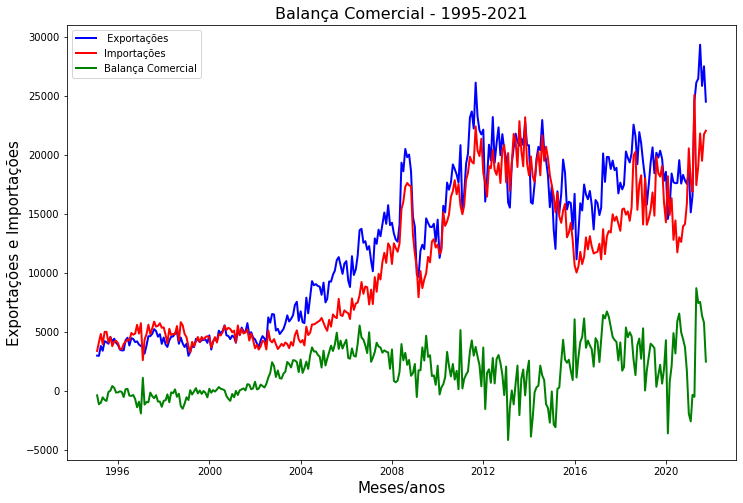

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('Balança Comercial - 1995-2021',fontsize = 16)
plt.plot(balcom.data,balcom.ex,lw =2, label = ' Exportações', c= 'b')
plt.plot(balcom.data,balcom.im,lw =2, label = 'Importações', c = 'r')
plt.plot(balcom.data, balcom.bc, lw=2, label = 'Balança Comercial', c='g')
plt.ylabel("Exportações e Importações",fontsize = 15)
plt.xlabel('Meses/anos',fontsize = 15)
plt.legend(loc = 'upper left')

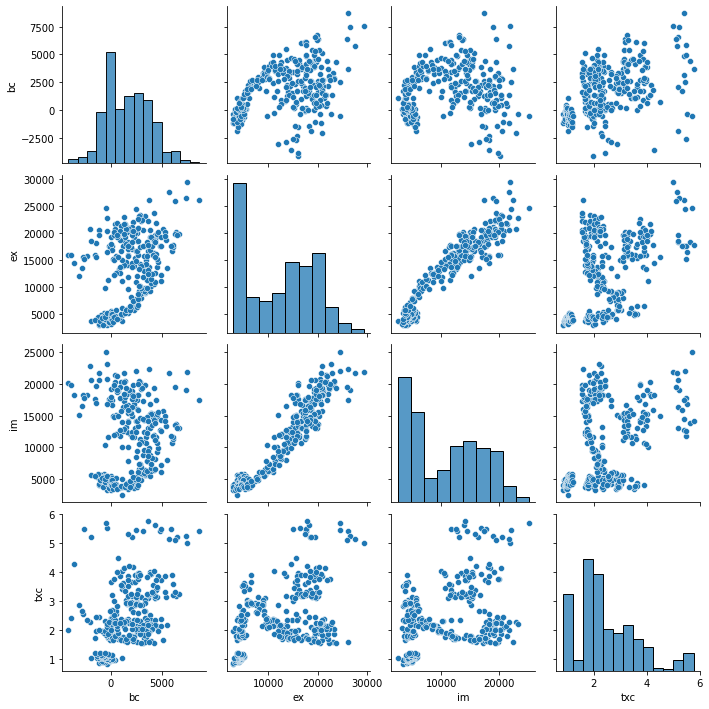

In [ ]:
sns.pairplot(balcom) ### Observando correlações entre as variáveis.

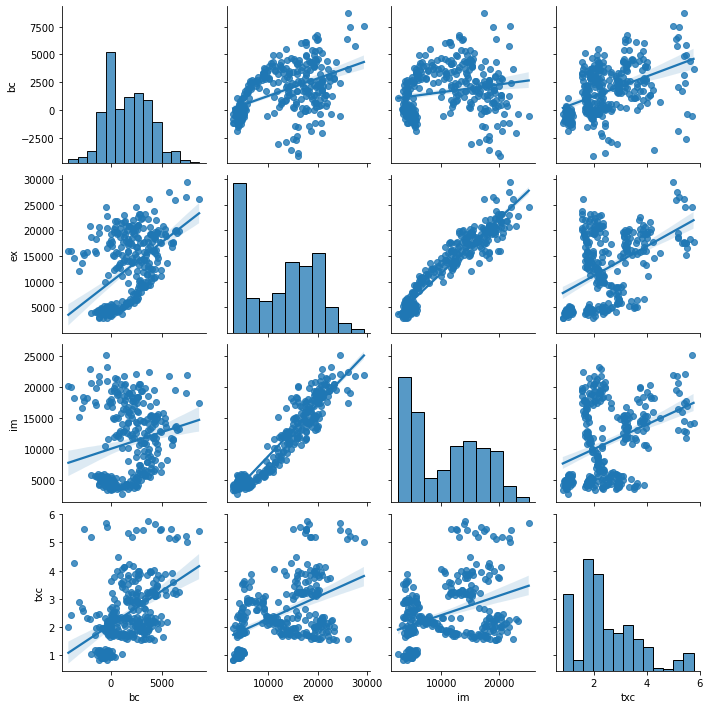

In [ ]:
sns.pairplot(balcom, kind = 'reg') ### Correlação com reta de regressão.

In [ ]:
balcom01 = pd.read_csv('/content/balcom.csv', decimal = ',') ### lendo o arquivo de novo, sem as datas.

In [ ]:
crbalcom01 = balcom01.pct_change()### Encontrando a variação percentual para o data frame todo.

In [ ]:
crbalcom01

,bc,ex,im,txc
0,NaN,NaN,NaN,NaN
1,1.888387,-0.008182,0.216272,0.011283
2,-0.114710,0.285525,0.172984,0.052261
3,-0.445120,-0.106816,-0.178557,0.018973
4,0.381828,0.241751,0.261822,-0.007667
...,...,...,...,...
316,-0.145012,0.012654,0.091254,-0.031720
317,0.012563,0.108947,0.146593,-0.043959
318,-0.155760,-0.119163,-0.106540,0.023869
319,-0.092635,0.064386,0.115563,0.004237


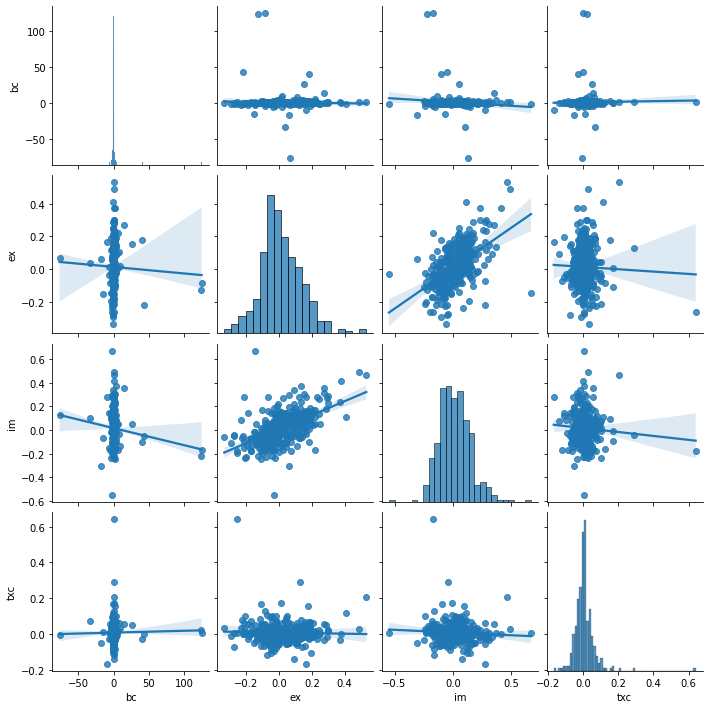

In [ ]:
sns.pairplot(crbalcom01, kind = 'reg') ### Correlação com reta de regressão.

**PIB x BC por raspagem**
---
***

In [ ]:
def get_data_bcb(código): ### Aqui estamos criando uma função para raspagem usando *urlopen*.
    url = "http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json".format(código) ### Endereço com espaço {} para a tabela específica.
    html = urlopen(url).read() ### Acionando a função de raspagem e leitura dos dados (*read*).
    df = pd.read_json(html) ### Acionando a função do *Pandas que faz a leitura em **JSON** já criando um data frame.
    df.index = pd.to_datetime(df['data']) ### No data frame que será criado, o *Index* assumirá os valores da data.
    df = df['valor'] ### Selecionando apenas os valores para o data frame.
    return df ### O retorno ou resultado da função é o próprio data frame.

In [ ]:
PIBr = get_data_bcb(7326) ### Crescimento real (%), início da série 1962.

In [ ]:
PIBr = PIBr.loc['1996-01-01':] ### Harmonizando com a série de taxa de juros.

In [ ]:
BCS = get_data_bcb(23464) ### Balança comercial e de serviços, em milhões de dólares. 

In [ ]:
BCS

data
1995-01-01   -11587.7
1996-01-01   -14915.2
1997-01-01   -17871.9
1998-01-01   -17404.5
1999-01-01    -9024.6
2000-01-01    -8999.4
2001-01-01    -6049.4
2002-01-01     7185.8
2003-01-01    18856.0
2004-01-01    27962.8
2005-01-01    35838.2
2006-01-01    35767.5
2007-01-01    25395.5
2008-01-01     6646.4
2009-01-01     5216.2
2010-01-01   -11888.1
2011-01-01    -9741.3
2012-01-01   -23393.1
2013-01-01   -46189.7
2014-01-01   -54977.5
2015-01-01   -19605.1
2016-01-01    13941.8
2017-01-01    19000.9
2018-01-01     7379.5
2019-01-01    -8942.4
2020-01-01    11428.3
Name: valor, dtype: float64

In [ ]:
vBCS = BCS.pct_change() ### Transformando em valores percentuais.

In [ ]:
vBCS = vBCS.dropna(how='all') ### Tirando a primeira informação, que é um NaN.

In [ ]:
vBCS.head()

data
1996-01-01    0.287158
1997-01-01    0.198234
1998-01-01   -0.026153
1999-01-01   -0.481479
2000-01-01   -0.002792
Name: valor, dtype: float64

In [ ]:
NX = pd.DataFrame({'PIBr': PIBr,'vBCS':vBCS}) ### Juntando as duas séries em um mesmo data frame.

In [ ]:
NX.head()

,PIBr,vBCS
data,,
1996-01-01,2.21,0.287158
1997-01-01,3.39,0.198234
1998-01-01,0.34,-0.026153
1999-01-01,0.47,-0.481479
2000-01-01,4.39,-0.002792


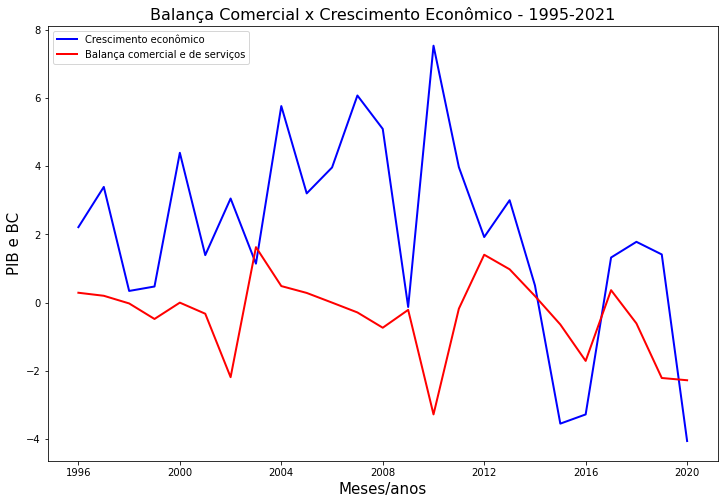

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('Balança Comercial x Crescimento Econômico - 1995-2021',fontsize = 16)
plt.plot(NX.PIBr,lw =2, label = 'Crescimento econômico', c= 'b')
plt.plot(NX.vBCS, lw =2, label = 'Balança comercial e de serviços', c = 'r')
plt.ylabel("PIB e BC",fontsize = 15)
plt.xlabel('Meses/anos',fontsize = 15)
plt.legend(loc = 'upper left')

In [ ]:
NX.corr(method='pearson') ### Calculando a correlaão entre crescimento econômico e variação na balança comerial e de serviços.

,PIBr,vBCS
PIBr,1.000000,0.083638
vBCS,0.083638,1.000000
